In [1]:
%config IPCompleter.greedy=True

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats


In [4]:
creditcard_df = pd.read_csv(r"CC GENERAL.csv")

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


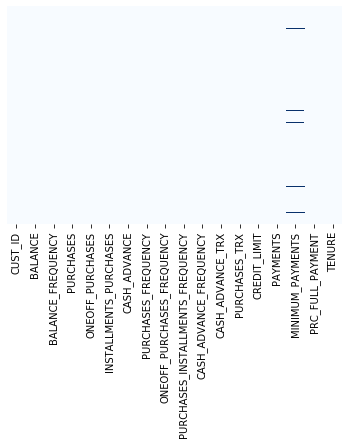

In [9]:
# check for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

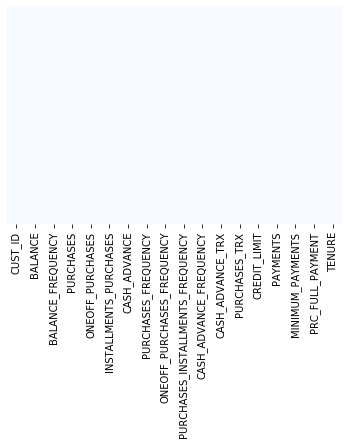

In [13]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [14]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [15]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

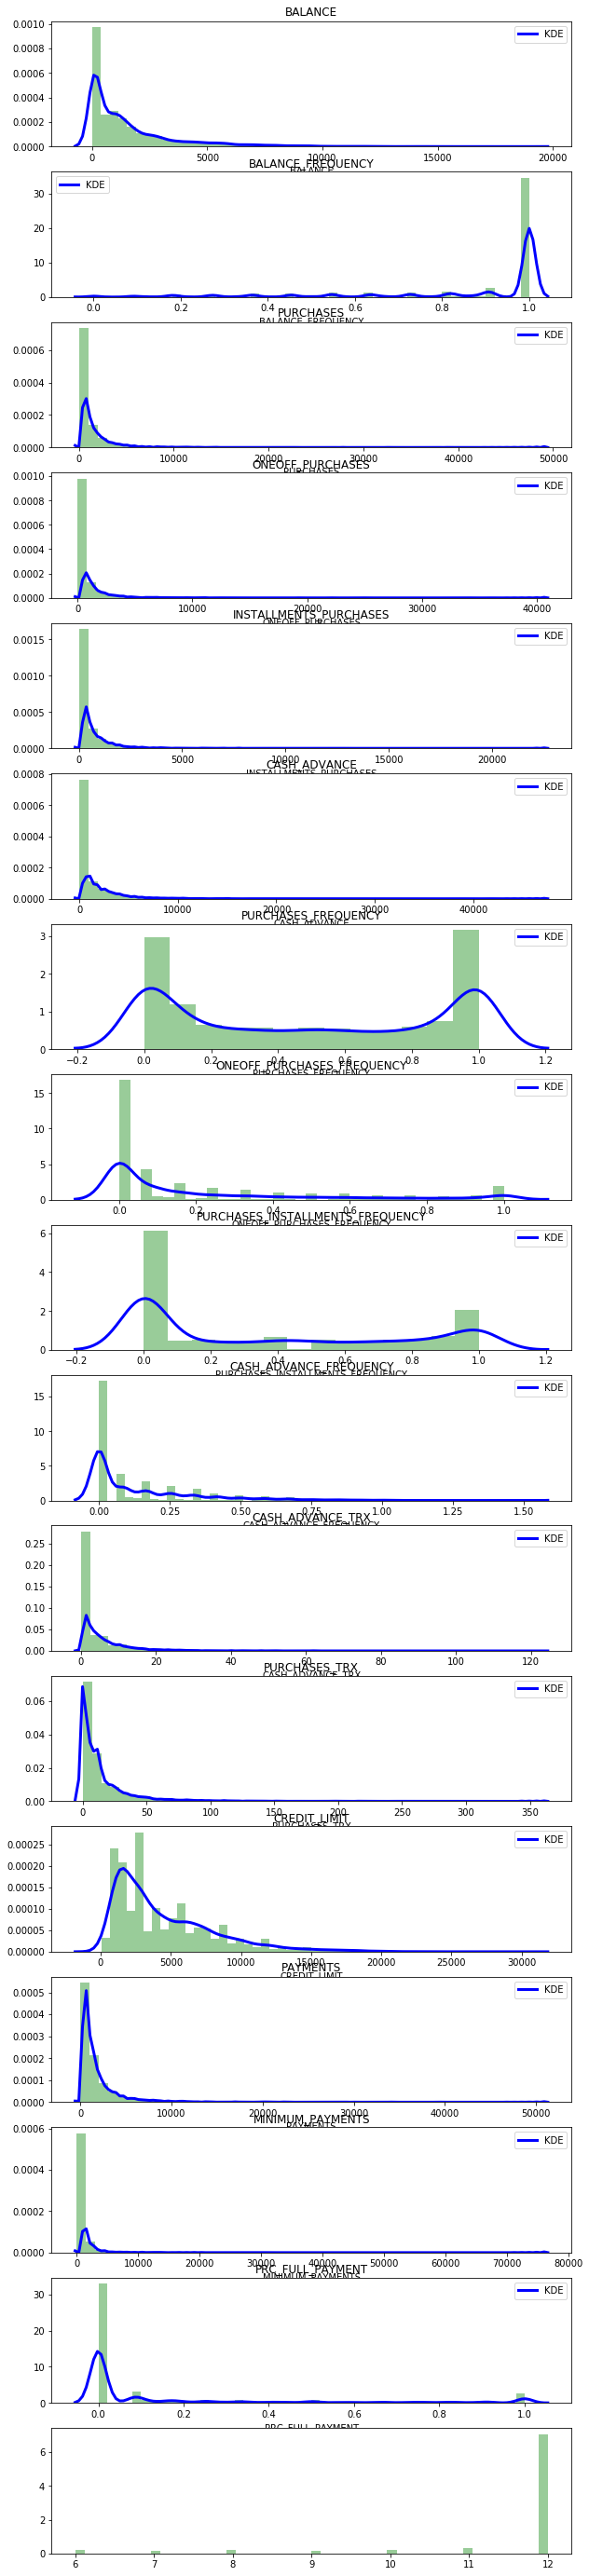

In [17]:
# Univariate analysis

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  #print(i)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

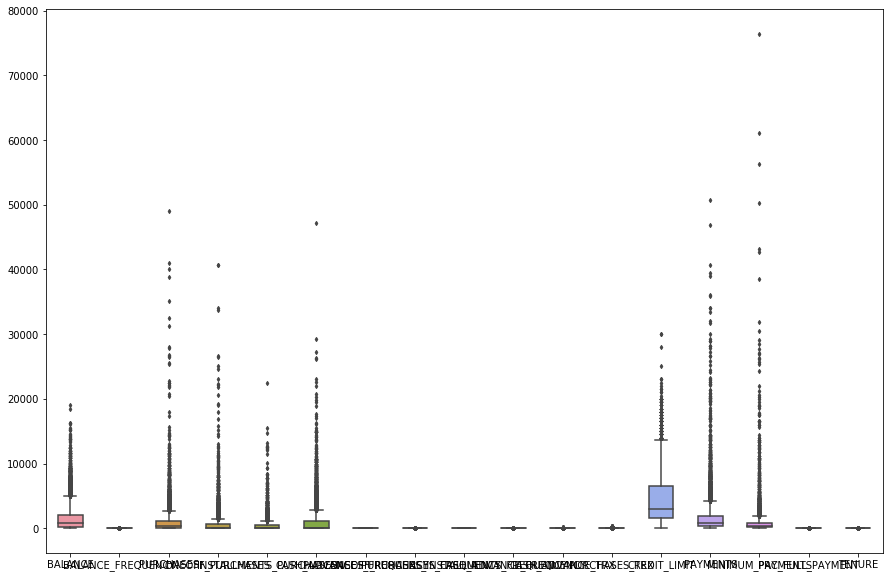

In [18]:
# Check for outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = creditcard_df,width=0.5,ax=ax,fliersize=3)

In [19]:
creditcard_df.shape

(8950, 17)

In [22]:
# Use z scores to remove outliers
z = np.abs(stats.zscore(creditcard_df))
creditcard_df = creditcard_df[(z < 3).all(axis=1)]

In [23]:
correlations = creditcard_df.corr()

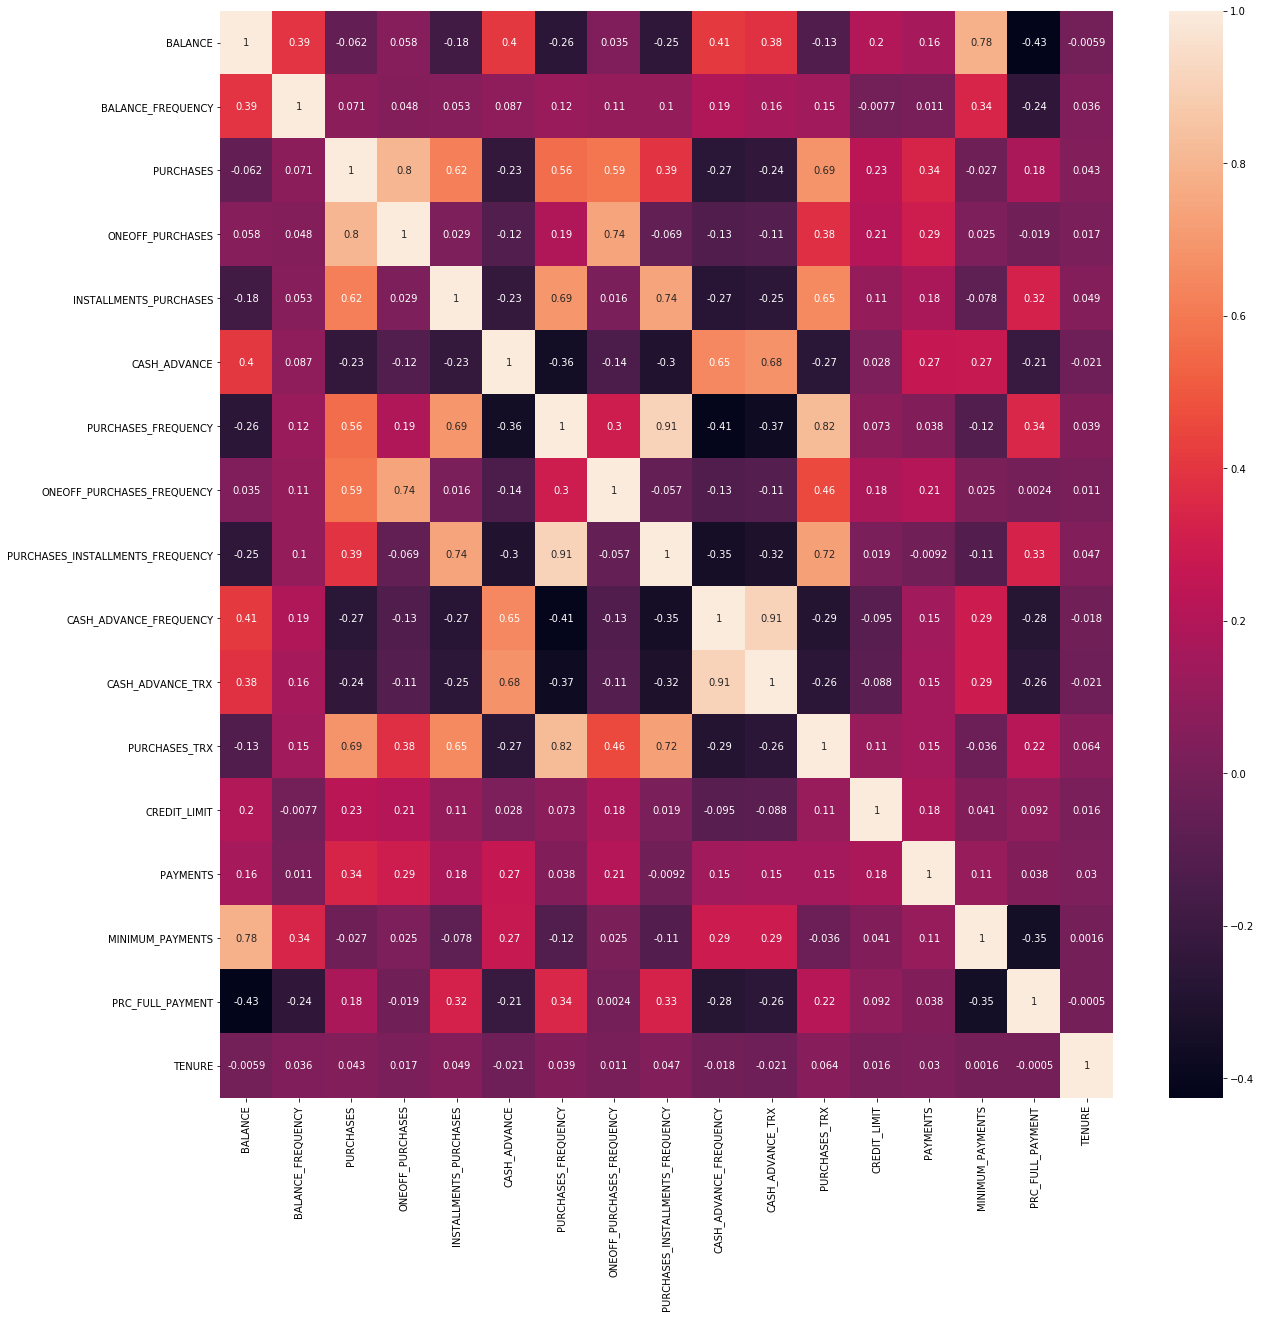

In [24]:
# Visualise correlations

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [35]:
# Let's scale the data before we begin modelling
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [36]:
creditcard_df_scaled.view()


array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.57780385,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.6237473 ,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.05048463,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.32215134,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5969573 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.49336345,
        -0.53152321, -4.6976356 ]])

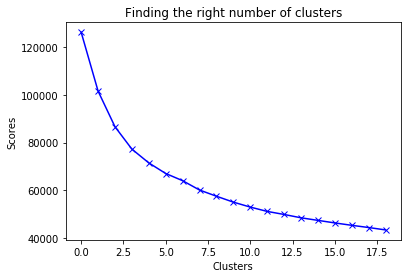

In [37]:
# Obtain optimal number of clusters
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [38]:
# Build the KMeans model
kmeans = KMeans(6)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [39]:
labels


array([0, 4, 5, ..., 0, 3, 0])

In [40]:
kmeans.cluster_centers_.shape

(6, 17)

In [41]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.020543,0.393110,-0.565658,-0.376137,-0.556805,-0.134479,-0.876491,-0.428312,-0.737348,0.085272,-0.053704,-0.646067,-0.379464,-0.362135,-0.005325,-0.469338,0.005692
1,0.329830,0.395651,2.473771,2.120907,1.686467,-0.206306,1.139242,1.535630,1.062586,-0.274021,-0.221877,2.186425,0.878013,1.324674,0.169465,0.382812,0.214909
2,-0.764329,-2.161127,-0.435826,-0.309986,-0.397060,-0.332533,-0.563446,-0.417702,-0.451972,-0.491589,-0.426243,-0.524880,-0.182692,-0.284150,-0.527164,0.366260,-0.131798
3,-0.447066,0.290015,0.030807,-0.392544,0.678844,-0.441080,1.007935,-0.431560,1.229288,-0.511176,-0.456791,0.357171,-0.292980,-0.271049,-0.140655,0.397004,-0.009214
4,1.339621,0.327426,-0.418690,-0.296552,-0.383866,1.807928,-0.609644,-0.317597,-0.514043,1.705428,1.779535,-0.448964,0.569915,0.630960,0.793147,-0.432097,-0.098906
5,-0.099774,0.324253,0.574736,0.908681,-0.260115,-0.418604,0.709379,1.673323,-0.253833,-0.457453,-0.429298,0.466076,0.415888,0.062539,-0.156769,0.169479,0.124319


In [42]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1301.012985,0.973529,173.113401,132.807919,40.381071,505.842061,0.138372,0.069162,0.068011,0.123216,2.102865,2.289807,2885.603570,777.394822,583.956551,0.018084,11.755284
1,1770.463739,0.974071,3289.661165,2114.232557,1175.428608,417.117561,0.937254,0.633990,0.774669,0.066172,1.440129,45.114887,6577.184466,3200.329438,719.655424,0.265894,11.922330
2,109.695284,0.428499,306.239414,185.299268,121.208506,261.196005,0.262439,0.072213,0.180050,0.031629,0.634766,4.122070,3463.268229,889.412435,178.824140,0.261080,11.645508
3,591.252472,0.951530,784.712336,119.788809,665.592848,127.112130,0.885213,0.068227,0.840116,0.028519,0.514384,17.457998,3139.494339,908.231060,478.892840,0.270021,11.743383
4,3303.175501,0.959513,323.810115,195.959206,127.884134,2905.203088,0.244130,0.101003,0.155681,0.380444,9.327273,5.269856,5672.699725,2203.877744,1203.854553,0.028914,11.671770
5,1118.389862,0.958836,1342.441534,1152.321364,190.499659,154.876102,0.766889,0.673590,0.257840,0.037049,0.622727,19.104545,5220.521694,1387.397452,466.382559,0.203855,11.850000


In [43]:
labels.shape

(7434,)

In [44]:
labels.max()

5

In [45]:
labels.min()

0

In [46]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,4.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,5.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0


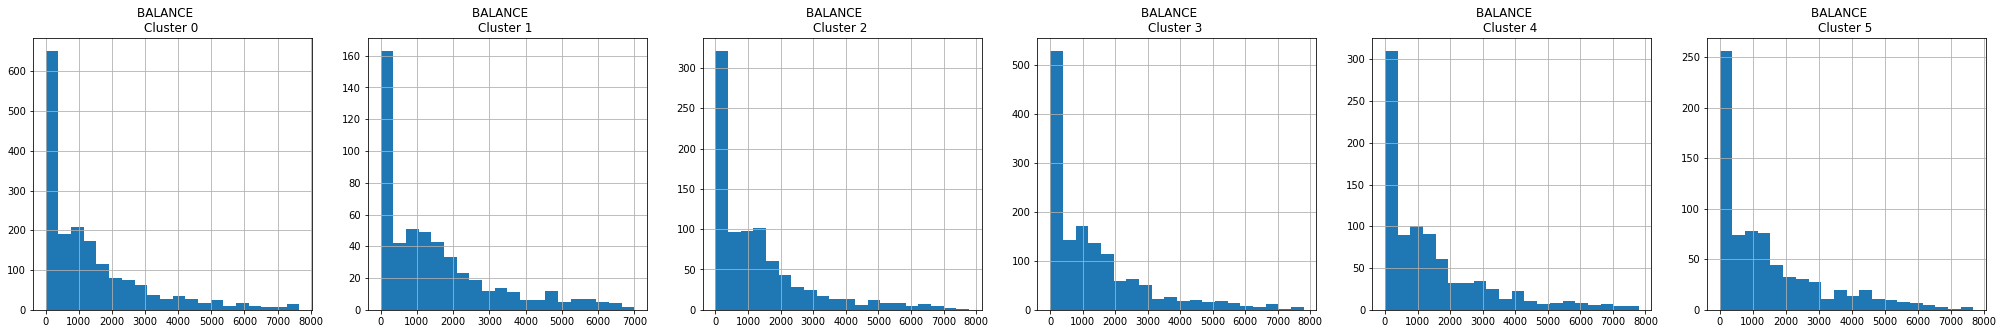

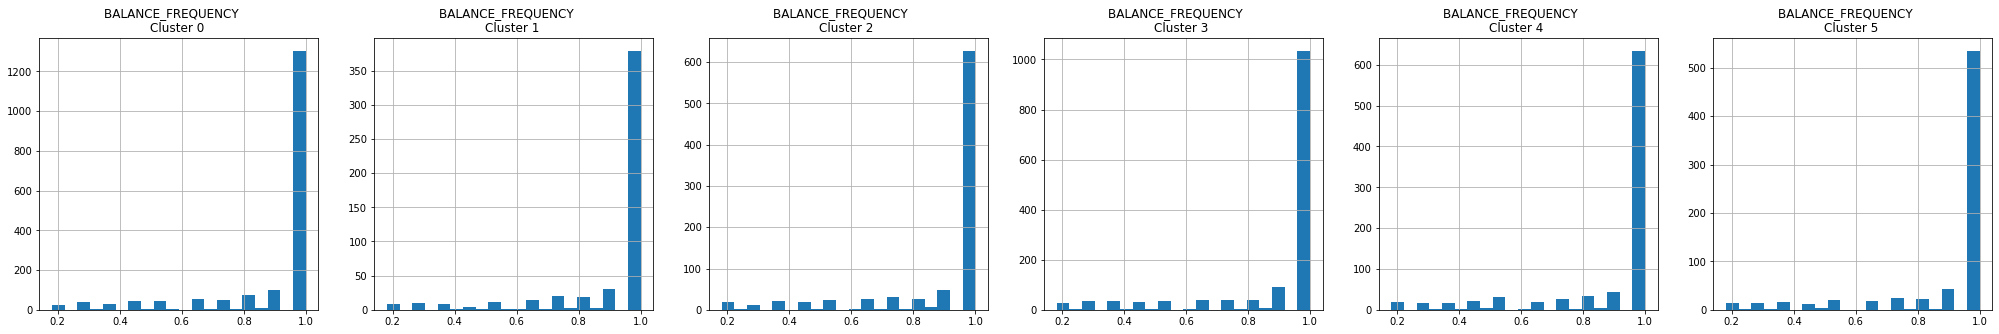

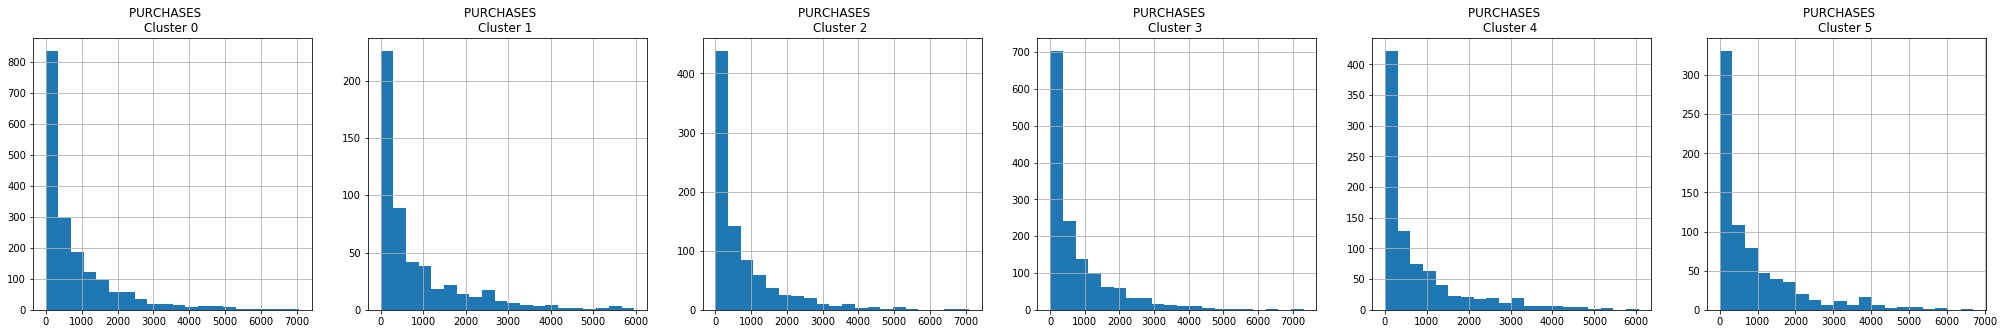

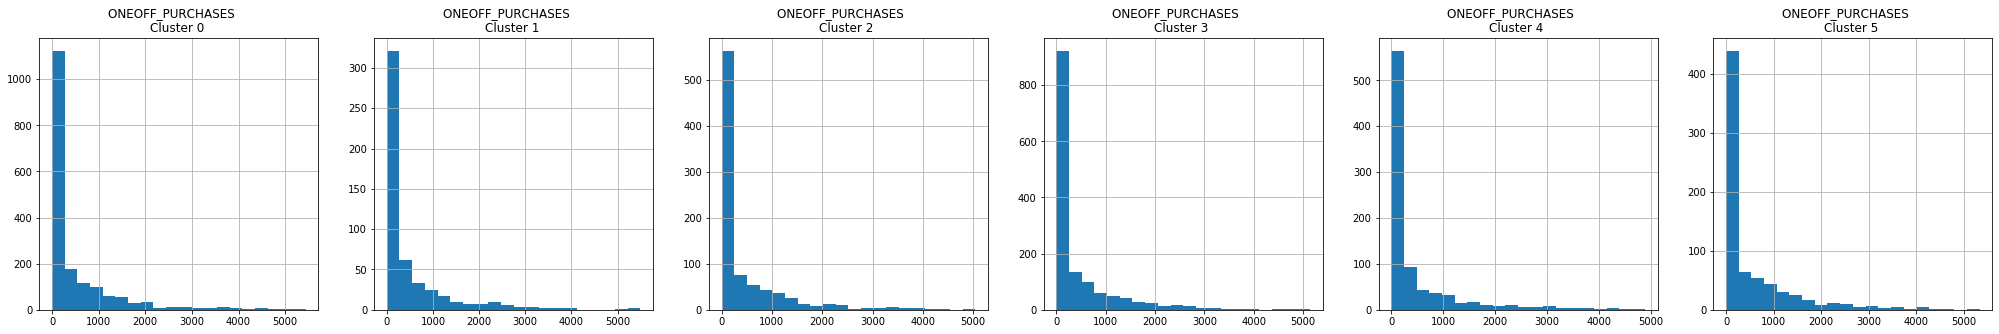

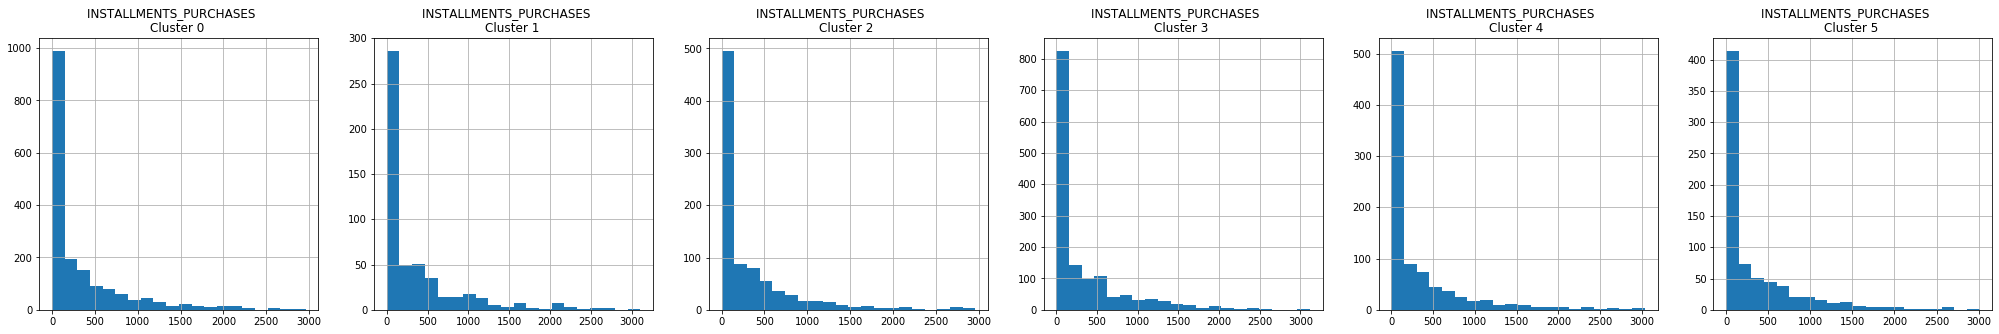

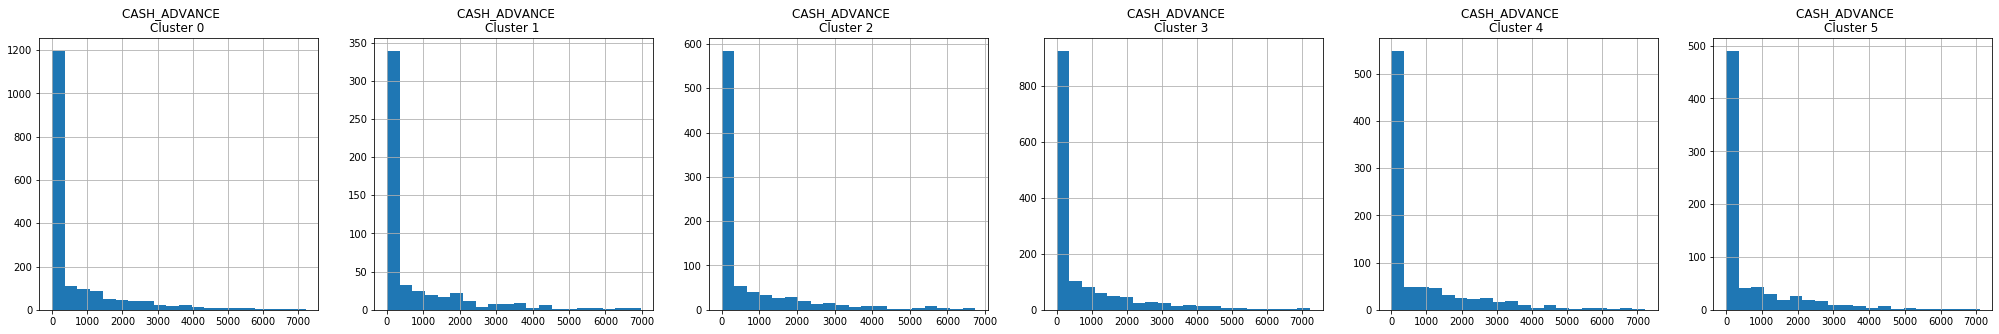

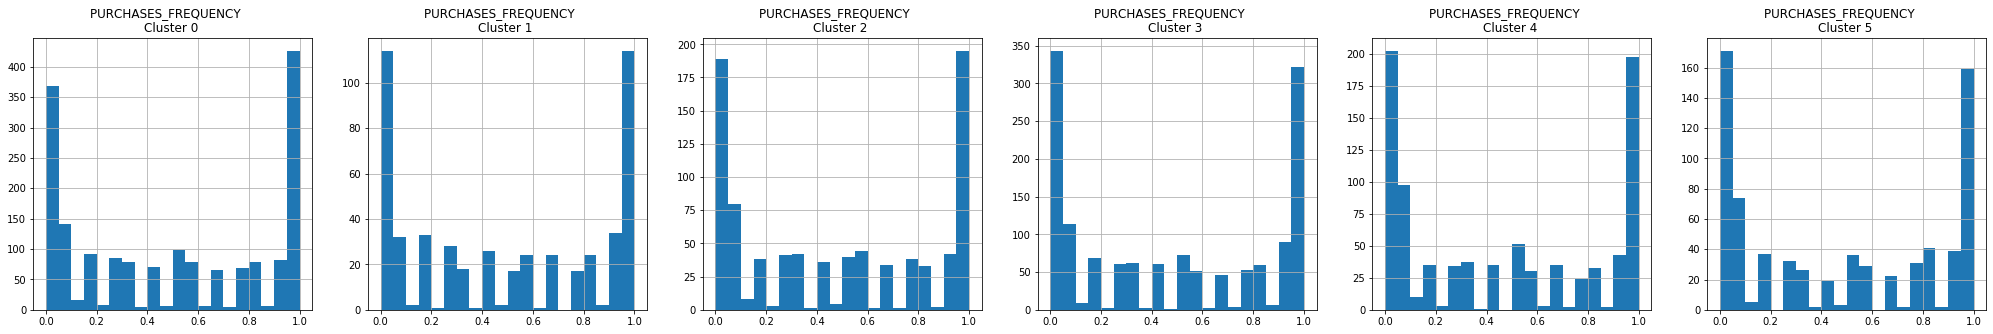

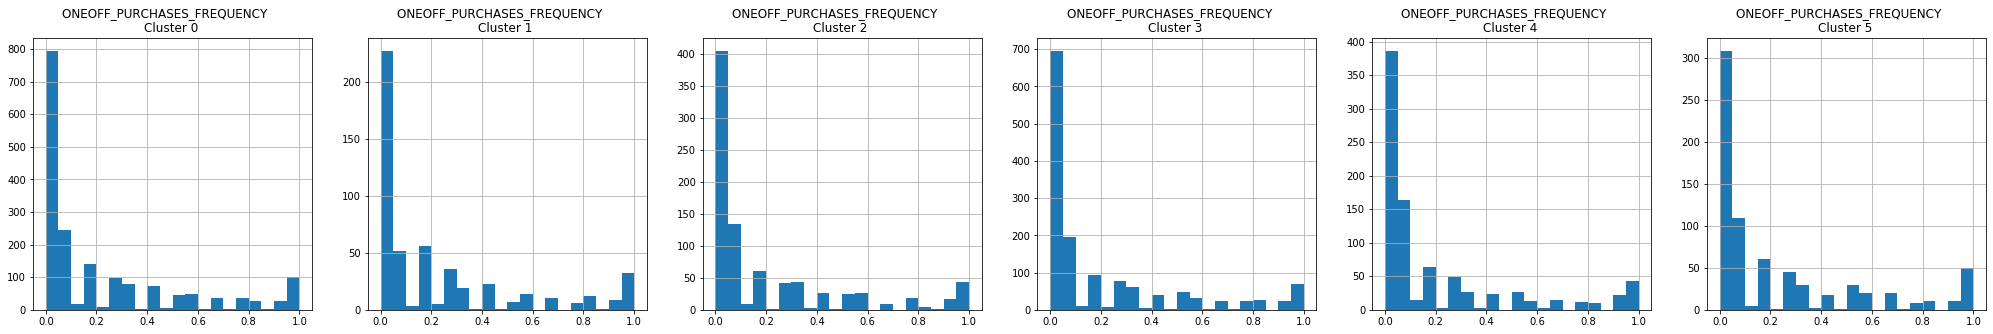

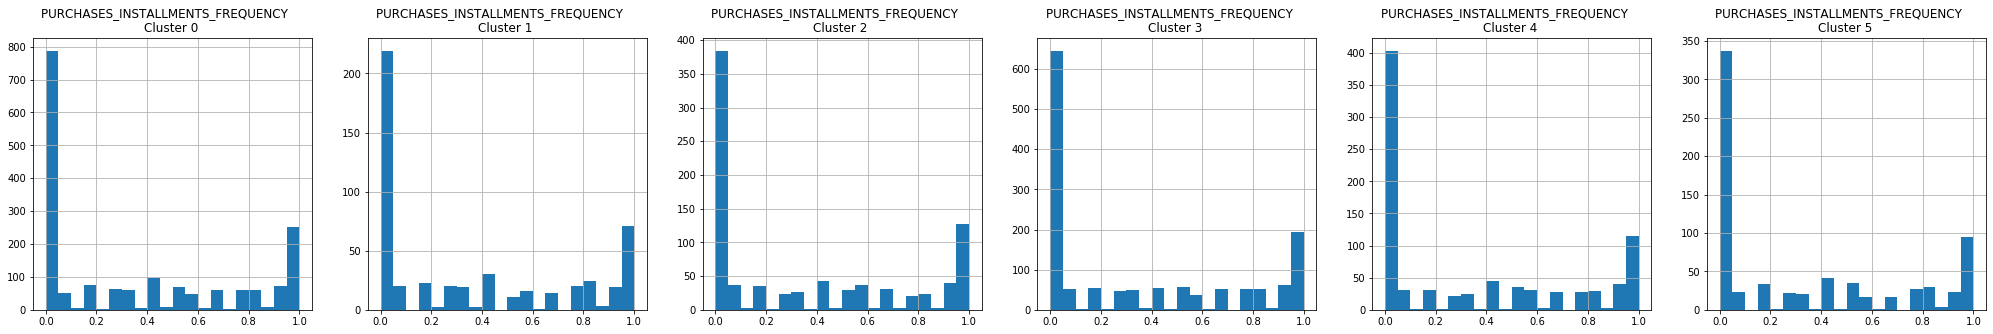

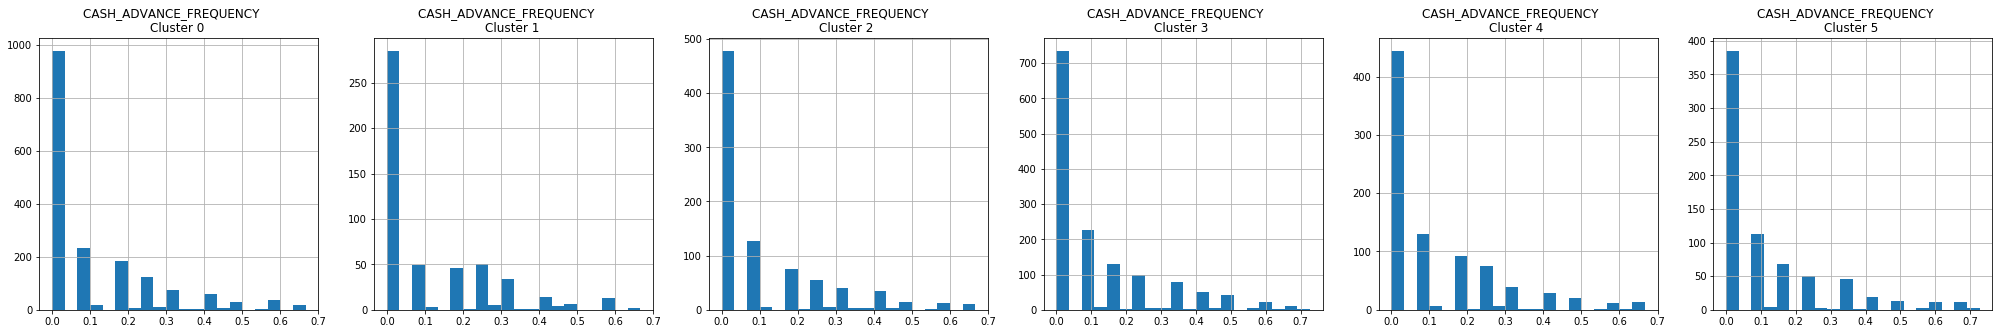

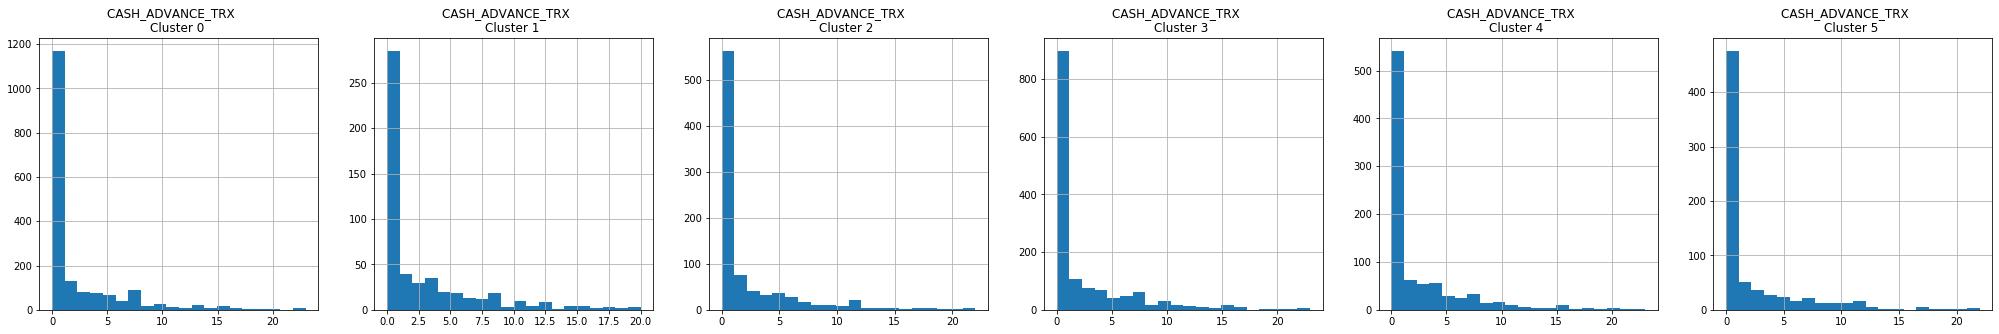

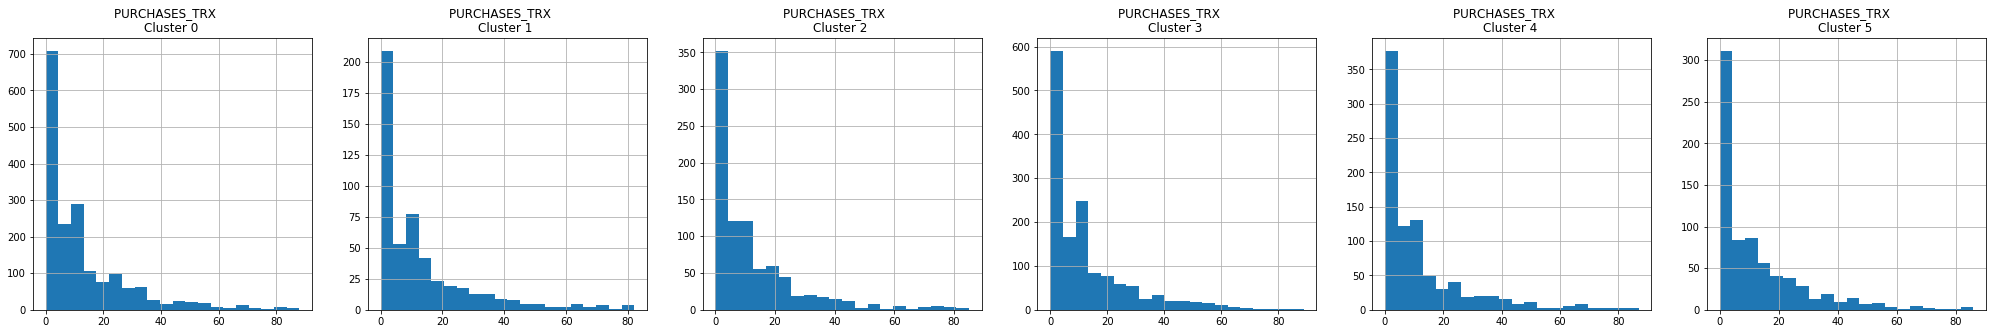

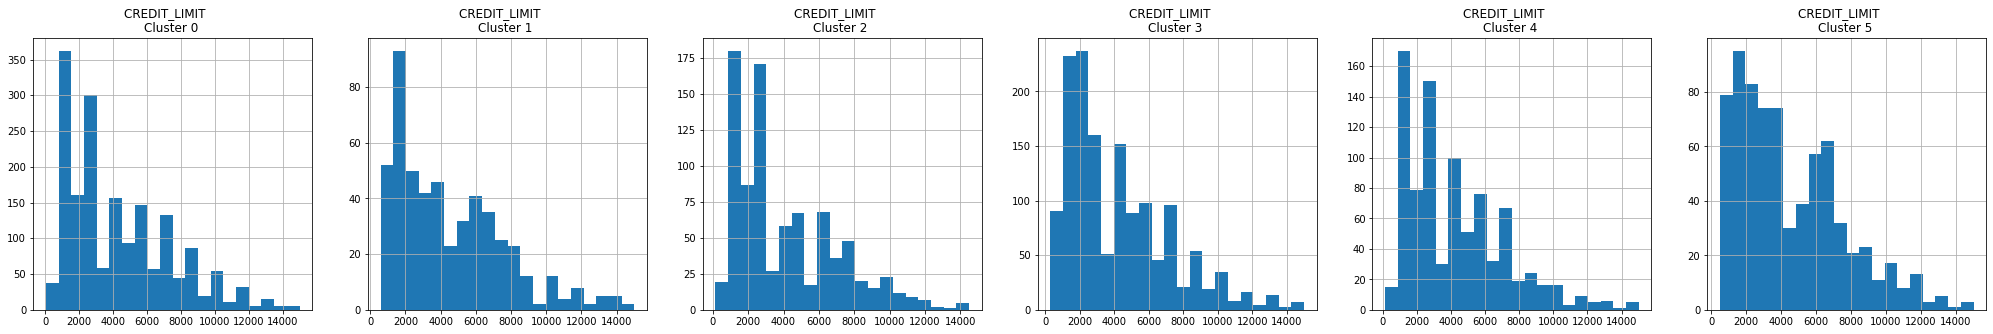

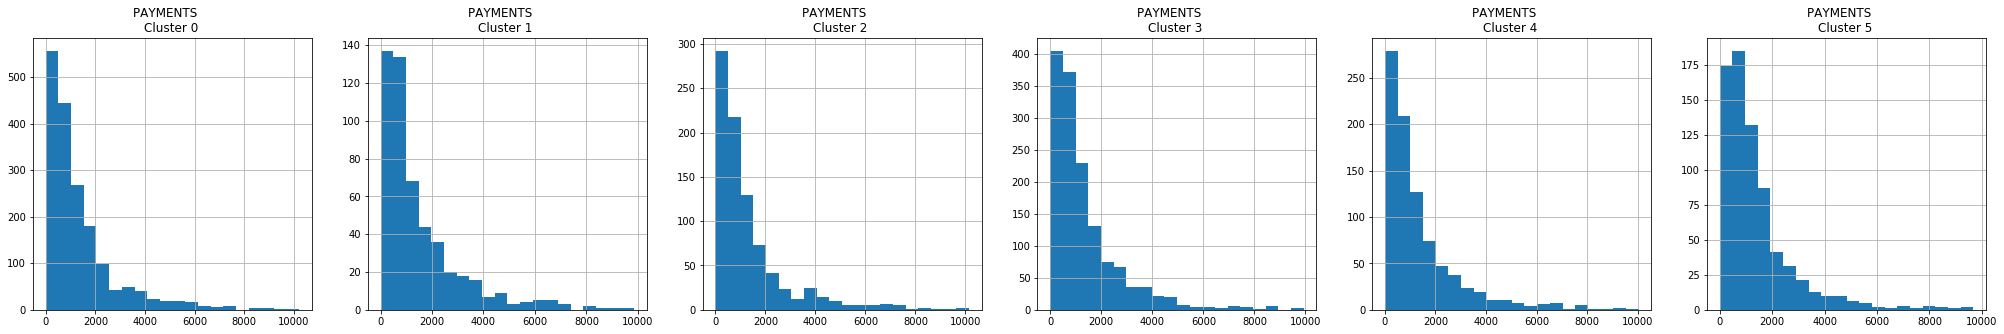

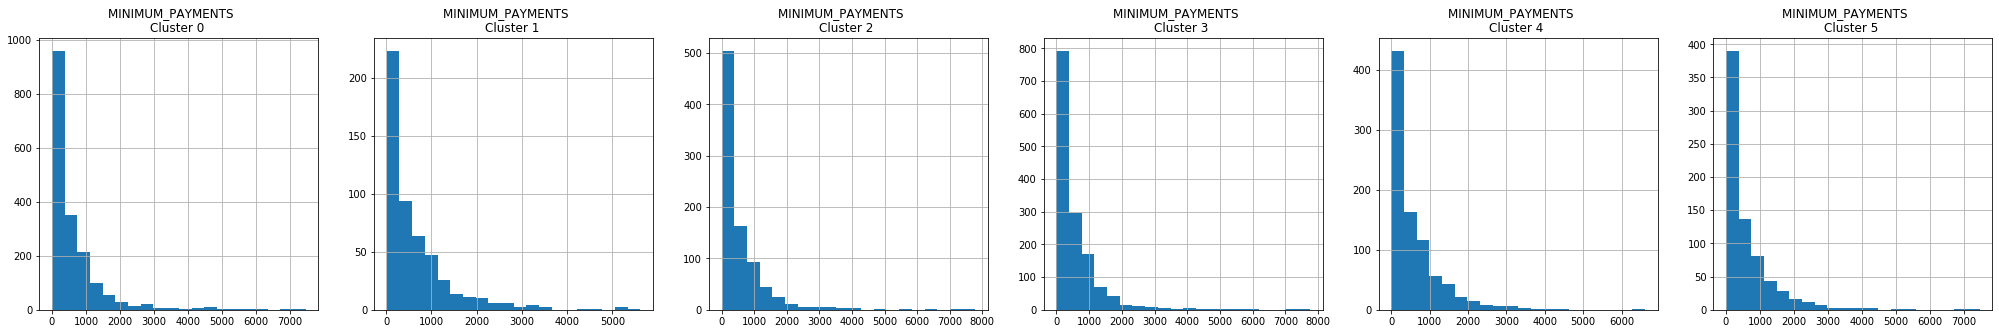

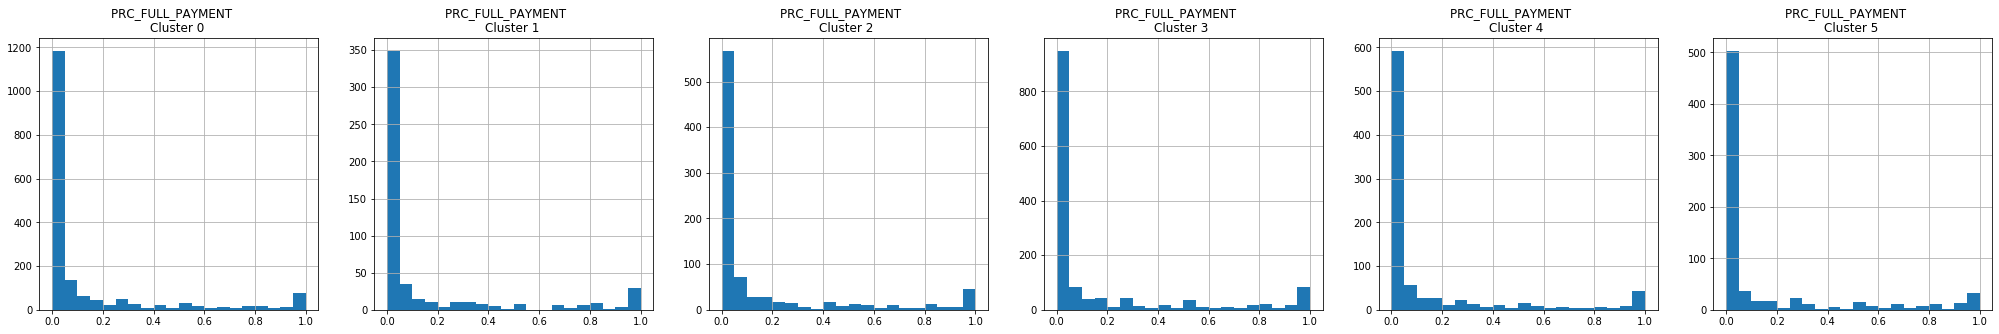

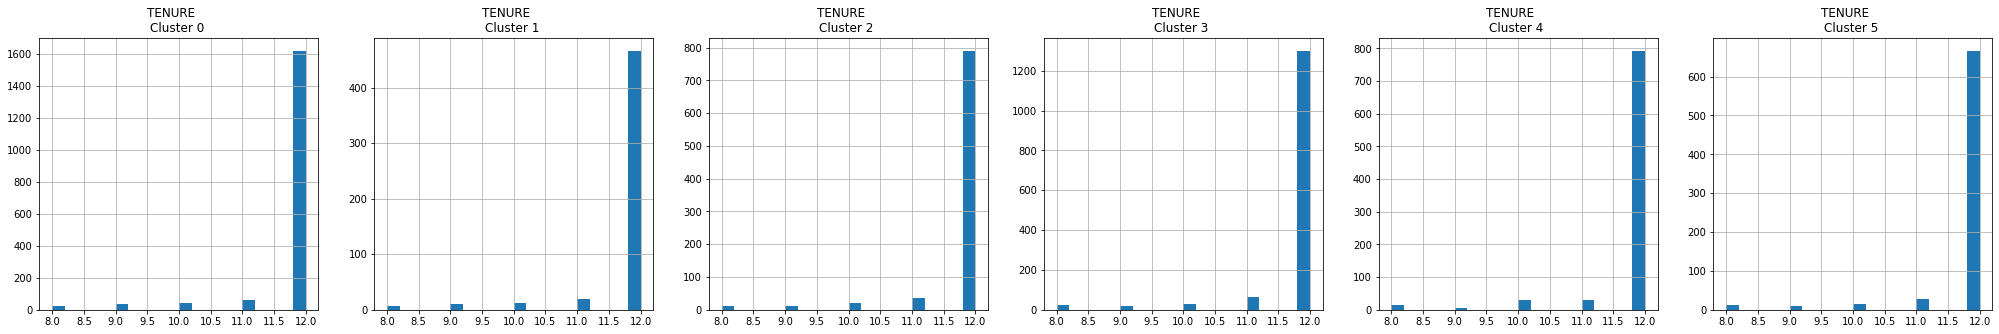

In [47]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(6):
    plt.subplot(1,6,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()
